# Project 0: Inaugural Project

Import packages

In [1]:
# Load all packages at the beginning:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt # baseline modul

# autoreload modules when code is run 
%load_ext autoreload
%autoreload 2

## Question 1

Construct a function which solves eq. (1) given the parameters.

**Explanation:** We have first defined two functions: the utility-function as well as the resources-function (res). These are the applied equivalents to the utility as well as the budget constraint (which is the wealth and income net of tax). Secondly, we defined a function that maximizes the utility through a loop. To call the utility maximizing function and print the solution we defined another function (print_solution), which shows the solution for the maximal, minimum and median value of the wage variable.

In [2]:
# Define the Utility-function:

def utility_function(c,l, v, epsilon):
    """ utility of consumption and labor
    
    Args:
    
        c (ndarray): consumption
        l (ndarray): labor supply values
        v (float): scale the disutility of labor
        epsilon (float): Frisch elasticity of labor supply
        
    Returns:
    
        (float): utility of consumption and labor
    
    """
    
    return (np.log(c)-v*((l**(1+1/epsilon))/(1+1/epsilon)))  
    
# Define the resources (constraint)

def res(l, m, w, tau_0, tau_1, kappa):
    """ total resources x
    
    Args:
    
        l_values (ndarray): possible values of labor supply
        m (float): cash-on-hand
        w (ndarray): possible values of wage
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        kappa (float): cut-off for top labor income bracket
        
    Returns:
    
        (ndarray): total resources which equal to c*                
    
    """
    x =  m+w*l-[tau_0*w*l+tau_1*np.fmax(w*l-kappa,0)]
    return x.reshape(-1,1)

In [3]:
# Define a function that maximizes Utility through a loop:

def find_best_choice (l, v, epsilon, m, w, tau_0, tau_1, kappa):
    """ solve for optimal labor choice
    
    Args:
        l (ndarray): possible values of labor supply
        v (float): scale the disutility of labor
        epsilon (float): Frisch elasticity of labor supply
        m (float): cash-on-hand
        w (ndarray): possible values of wage
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        kappa (float): cut-off for top labor income bracket
    
    Returns:
    
        c_best (ndarray): best consumption choices given wage
        l_best (ndarray): best labor supply choices given wage
        u_best (ndarray): implied utility given wage
    
    """
    # a. set empty array/ matrix to be filled with values
    u_values = np.empty([w.size, l.size])
    l_best = np.empty(w.size)
    c_best = np.empty(w.size)
    u_best = np.full(w.size,-np.inf)
    
    # b. given wage w
    for i in range(w.size):
        w_now = w[i]
        
    # c. loop through all possible l_values
        for j in range(l.size):
                # i. define labor supply and implied optimal consumption  
                l_now = l[j]
                c = res(l_now, m, w_now, tau_0, tau_1, kappa)
                # ii. utility given wage i and labor supply j
                u_values[i,j] = utility_function(c, l_now, v, epsilon)
                # iii. check if best sofar given wage i
                if u_values[i,j] > u_best[i]:
                    l_best[i] = l_now
                    c_best[i] = c
                    u_best[i] = u_values[i,j]
                    
    return c_best, l_best, u_best

In [ ]:
# Define a function that prints the solution:
def print_solution(l, v, epsilon, m, w, tau_0, tau_1, kappa, names):
    
    c_best, l_best, u_best = find_best_choice (l, v, epsilon, m, w, tau_0, tau_1, kappa)
    
    names =['min', 'median', 'max']
    index = [0,len(w)//2,-1]
    for name, i in zip(names,index):
        text = f'{name} wage = '
        text += f'{w[i]:.2f}: '
        text += '(optimal consumption = '
        text += f'{c_best[i]:.2f}; '
        text += 'optimal labor supply = '
        text += f'{l_best[i]:.2f}) '
        text += f'\n'
        
        print(text)

We use the following parameter values 

m=1, ν=10, ε=0.3, τ0 =0.4, τ1 =0.1, κ=0.4

In [5]:
# Define parameters:

m = 1 # cash-on-hand
v = 10 # scale the disutility of labor
epsilon = 0.3 # Frisch elasticity of labor supply
tau_0 = 0.4 # standard labor income tax
tau_1 = 0.1 # top bracket labor income tax
kappa = 0.4 # cut-off for top labor income bracket

## Question 2

Plot l⋆ and c⋆ as functions of w in the range 0.5 to 1.5.

**Explanation:** We first call the print_solution function in order to test if the results make sense, they do indeed. The plots show that labor supply is an increasing concave function of wage, except at wage=1 where a kink in the function can be found. The kink can be explained by the fact that at wage=1, optimal labor is exactly equal to 0.4, which is kappa, the cut-off for top labor income bracket. So, from the point (wage=1, optimal labor supply=0.4) on, income is taxed at a higher rate. As at the same time, labor supply (hours) have a negative effect on the utility, the latter are reduced as the substitution effect dominates the income effect. 
Consumption as a consequence is a strictly increasing function of the wage except around wage=1 where is non-increasing and non-decreasing.

In [6]:
# Define values for wage and labor supply:
                       
n = 1000                                                                     

# define wage values:
w_values = np.linspace(0.5,1.5,n)

# define labor supply values between 0 and 1:
l_values = np.linspace(0, 1, n)

In [7]:
# Test our function:
print_solution(l_values, v, epsilon, m, w_values, tau_0, tau_1, kappa, names)

min = 0.50: (optimal consumption = 1.10; optimal labor supply = 0.34) 

median = 1.00: (optimal consumption = 1.24; optimal labor supply = 0.40) 

max = 1.50: (optimal consumption = 1.35; optimal labor supply = 0.42) 



In [8]:
# Define a function that plots the results:

def plot(l, v, epsilon, m, w, tau_0, tau_1, kappa):
    """ plot optimal choices of consumption and labor supply dependent on wage w
    
    Args:
        l (ndarray): possible values of labor supply
        v (float): scale the disutility of labor
        epsilon (float): Frisch elasticity of labor supply
        m (float): cash-on-hand
        w (ndarray): possible values of wage
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        kappa (float): cut-off for top labor income bracket
        
    """
         

    # plot
    plt.style.use("seaborn")

    # a. create the figure
    fig = plt.figure(figsize=(10,4))

    # b. unpack solution
    c_best, l_best, u_best = find_best_choice(l, v, epsilon, m, w, tau_0, tau_1, kappa)

    # c. left plot
    ax_left = fig.add_subplot(1,2,1)

    ax_left.plot(w, l_best)

    ax_left.set_title('optimal labor supply')
    ax_left.set_xlabel('wage')
    ax_left.set_ylabel('$l*$')
    ax_left.set_ylim([0.3,0.5])
    ax_left.set_xlim([np.min(w),np.max(w)])
    ax_left.grid(True)

    # c. right plot
    ax_right = fig.add_subplot(1,2,2)

    ax_right.plot(w, c_best)

    ax_right.set_title('optimal consumption')
    ax_right.set_xlabel('wage')
    ax_right.set_ylabel('$c*$')
    ax_right.set_ylim([1,1.4])
    ax_right.set_xlim([np.min(w),np.max(w)])
    ax_right.grid(True)

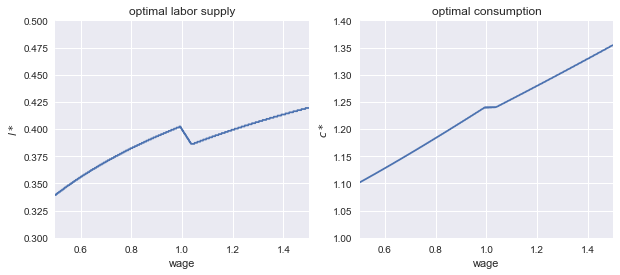

In [9]:
# Call the plot-function:

plot(l_values, v, epsilon, m, w_values, tau_0, tau_1, kappa)

 Consider a population with N = 10, 000 individuals indexed by i. Assume the distribution of wages is uniform such that

In [10]:
# Considering a population with N indiviudals indexed by i:                                                          

# Population 
N = 10000 

# Drawing random wages 
seed = 22
np.random.seed(seed)
w = np.random.uniform(low=0.5,high=1.5,size=N)

# Define labor supply values between 0 and 1:
l = np.linspace(0, 1, 1000)

In [11]:
# optimal choice
def individual_best_solution(l, v, epsilon, m, w, tau_0, tau_1, kappa):
    
    c_best, l_best, u_best = find_best_choice (l, v, epsilon, m, w, tau_0, tau_1, kappa)
    
    individual_best_solution = np.empty([w.size, 4])
    
    for i in range(w.size):
        individual_best_solution[i,0] = w[i]
        individual_best_solution[i,1] = c_best[i]
        individual_best_solution[i,2] = l_best[i]
        individual_best_solution[i,3] = u_best[i]
          
    return individual_best_solution

In [12]:
print_solution(l, v, epsilon, m, w, tau_0, tau_1, kappa, names)

min = 0.71: (optimal consumption = 1.16; optimal labor supply = 0.37) 

median = 1.03: (optimal consumption = 1.24; optimal labor supply = 0.39) 

max = 1.34: (optimal consumption = 1.31; optimal labor supply = 0.41) 



## Question 3

Calculate the total tax revenue

**Explantion:** The total tax revenue is 1616.13. This result makes sense if wages are uniformly distributed between 0,5 and 1,5 and optimal labor supply is somehow between 0.325 and 0.425 and taxed by 40% with 10’000 agents.

In [13]:
# Define a tax revenue function:
def tax_rev(l, v, epsilon, m, w, tau_0, tau_1, kappa, do_print=True):
    """ Total Tax Revenue
    
    Args:
        l (ndarray): possible values of labor supply
        v (float): scale the disutility of labor
        epsilon (float): Frisch elasticity of labor supply
        m (float): cash-on-hand
        w (ndarray): possible values of wage
        tau_0 (float): standard labor income tax
        tau_1 (float): top bracket labor income tax
        kappa (float): cut-off for top labor income bracket
        
    Returns:
    
       taxrev (float): Total Tax Revenue
    
    """
    
    c_star, l_star, u_star = find_best_choice(l, v, epsilon, m, w, tau_0, tau_1, kappa)
    taxrev = tau_0*np.sum(w*l_star)+tau_1*np.sum(np.fmax(w*l_star-kappa,0)) 
    text = f'Total Tax Revenue = {taxrev:.3f}'
    # d. print
    if do_print:
        print(text)
    return taxrev    

In [14]:
# Call the tax_rev function:
tax_rev(l, v, epsilon, m, w, tau_0, tau_1, kappa)

Total Tax Revenue = 1632.201


1632.200828767114

## Question 4

What would the tax revenue be if instead ε = 0.1?

**Explanation:** The tax revenue increased to 3170.88. This is very intuitive, as elasticity is smaller, agents react less strongly to taxes and hence work more. 

In [15]:
# Epsilon is 0.1 instead of 0.3:
epsilon_new = 0.1

# Print solution of optimal consumptions and labor supply given the new epsilon value
print_solution(l, v, epsilon_new, m, w, tau_0, tau_1, kappa, names)

# Call the tax_rev function with the new epsilon:
tax_rev(l, v, epsilon_new, m, w, tau_0, tau_1, kappa)

min = 0.71: (optimal consumption = 1.29; optimal labor supply = 0.70) 

median = 1.03: (optimal consumption = 1.41; optimal labor supply = 0.72) 

max = 1.34: (optimal consumption = 1.53; optimal labor supply = 0.73) 

Total Tax Revenue = 3200.366


3200.3655582592223

## Question 5

Consider a politician who wishes to maximize the tax revenue.

Which τ0, τ1 and κ would you suggest her to implement? Report the tax revenue you expect to obtain.

**Explanation:** We defined a function that maximize the tax revenue.  Using different input values for the τ0, τ1, and κ, we calculate the tax revenue for each input given the best choices of labor supply and consumption by looping through all input values. Then we take the maximal tax revenue and report the optimal input values. Unfortunately, the code is really computationally expensive.

In [19]:
# Define a tax revenue maximization function:

def tax_max(l, v, epsilon, m, w, tau_0, tau_1, kappa, multiply=1):
    """ Optimal Total Tax Revenue given set of tau_0, tau_1, and kappa 
    
    Args:
        l (ndarray): possible values of labor supply
        v (float): scale the disutility of labor
        epsilon (float): Frisch elasticity of labor supply
        m (float): cash-on-hand
        w (ndarray): possible values of wage
        tau_0 (ndarray): set of standard labor income tax policy values
        tau_1 (ndarray): set of top bracket labor income tax policy values
        kappa (ndarray): set of cut-off for top labor income bracket policy values
        multiply (float): multiplies the tax revenue, so that the function can be simulated with fewer agents, but is still comparable
    
    Returns:
    
       Text: Maximal Tax Revenue = tax_max 
             with:
             Tau0 optimal: tau_0_best
             Tau1 optimal: tau_1_best
             Kappa optimal: kappa_best
    
    """
    # a. set empty array/ matrix to be filled with values
    rev = np.empty([tau_0.size, tau_1.size, kappa.size])    
    # b. loop through all possible tau_0 values
    for i in range(tau_0.size):
        tau_0_now = tau_0[i]
        
    # c. loop through all possible tau_1 values
        for j in range(tau_0.size):
            tau_1_now = tau_1[i,j]
                
    # d. loop through all possible kappa values
            for k in range(kappa.size):
                kappa_now = kappa[k]
                
                # i. calcuate tax revenue 
                rev[i,j,k] = tax_rev(l, v, epsilon, m, w, tau_0_now, tau_1_now, kappa_now, do_print=False)
    
                
    # e.
    tax_max = np.max(rev) * multiply
    index_max = np.unravel_index(np.argmax(rev, axis=None), rev.shape)
    tau_0_best = tau_0[index_max[0]]
    tau_1_best = tau_1[index_max[0], index_max[1]]
    kappa_best = kappa[index_max[2]]
    
    # f.
    text = f'Maximal Tax Revenue = {tax_max:.3f} '
    text += f'\n'
    text += f' with:\n'
    text += f'Tau0 optimal: {tau_0_best:.3f}'
    text += f'\n'
    text += f'Tau1 optimal: {tau_1_best:.3f}'
    text += f'\n'
    text += f'Kappa optimal: {kappa_best:.3f}'
    
    print(text)

By setting the possible tax-policy values, it is important to keep in mind that the maximal individual tax amount can not exceed the total earnings (there is no cash on hand). 

Hence:

max tax = τ0 * wl + τ1 *(wl - κ) = wl

which yields:

τ1*(1-κ/wl) = 1 - τ0

we simplify it to: 

 max τ1 = 1 - τ0


In [31]:
# possible tax-policy values
tau_0_space = np.linspace(0.1, 1, 10)
tau_1_space = np.linspace((1-tau_0_space),0, 10)
kappa_space = np.linspace(0.1, 1, 10)
w_tax = np.linspace(0.5,1.5,100)
l_tax = np.linspace(0,1,100)  

Because of computational considerations, we use w_tax instead of w. We approximate the uniform dist. of the wage by using linspace, which should speed up our function. Moreover, we restrict it to only 1000 agents.  

Since we use only 1000 agents instead of 10'000, we need to multiply the tax revenue by 10. Hence, the multiplication value of 10 in the tax_max fucntion.

In [32]:
# Call tax revenue maximization function with the old epsilon: 
tax_max(l_tax, v, epsilon, m, w_tax, tau_0_space, tau_1_space, kappa_space, multiply=100)

Maximal Tax Revenue = 2465.740 
 with:
Tau0 optimal: 0.800
Tau1 optimal: 0.200
Kappa optimal: 0.600


If you are curious. Also the code for the new epsilon = 0.1:

## Conclusion

Our inaugural project suffers from computational inefficiencies. Especially, the optimisation using a loop is really slow and might therefore not be the best approach. Nevertheless, we got results that are economically reasonable. 